# 05 - Model Analysis

## 1. Load Data and Model
We use the best model selected previously and evaluate it on the test set.


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
import sys
sys.path.append('..')
from src.modeling import evaluate_model_with_threshold

df = pd.read_csv('../data/processed/credit_card_default_processed.csv')
X = df.drop('default_payment', axis=1)
y = df['default_payment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## 2. Evaluate Best Model
Assume Random Forest was selected (update if Logistic Regression was better).


In [9]:
# Load and evaluate logistic regression model
from src.utils import load_model

# Load the trained logistic regression model
lr_model = load_model('best_logistic_regression.joblib')

evaluate_model_with_threshold(lr_model, X_test, y_test, 'Logistic Regression')


Logistic Regression Optimal Threshold: 0.538

Logistic Regression Performance (Default Threshold = 0.5):
Accuracy: 0.77
Precision: 0.48
Recall: 0.58
F1-Score: 0.52
AUC-ROC: 0.75
Confusion Matrix:
 [[3825  848]
 [ 566  761]]

Logistic Regression Performance (Optimal Threshold = 0.54):
Accuracy: 0.78
Precision: 0.5
Recall: 0.56
F1-Score: 0.53
AUC-ROC: 0.75
Confusion Matrix:
 [[3914  759]
 [ 587  740]]


In [11]:
# Load and evaluate random forest model
rf_model = load_model('best_random_forest.joblib')

evaluate_model_with_threshold(rf_model, X_test, y_test, 'Random Forest')


Random Forest Optimal Threshold: 0.526

Random Forest Performance (Default Threshold = 0.5):
Accuracy: 0.78
Precision: 0.51
Recall: 0.58
F1-Score: 0.54
AUC-ROC: 0.78
Confusion Matrix:
 [[3915  758]
 [ 566  761]]

Random Forest Performance (Optimal Threshold = 0.53):
Accuracy: 0.79
Precision: 0.53
Recall: 0.56
F1-Score: 0.55
AUC-ROC: 0.78
Confusion Matrix:
 [[3998  675]
 [ 586  741]]


In [12]:
# Compare models and select the best one
if rf_model.score(X_test, y_test) > lr_model.score(X_test, y_test):
    best_model = rf_model
    print("Random Forest selected as best model")
else:
    best_model = lr_model 
    print("Logistic Regression selected as best model")


Random Forest selected as best model


### ROC curve

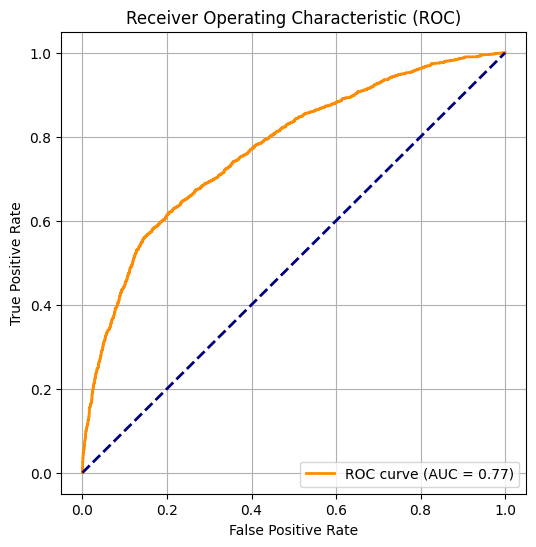

In [20]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities from best model
y_scores = best_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## 3. Feature Importance (if Random Forest)
Visualize the most important features for prediction.


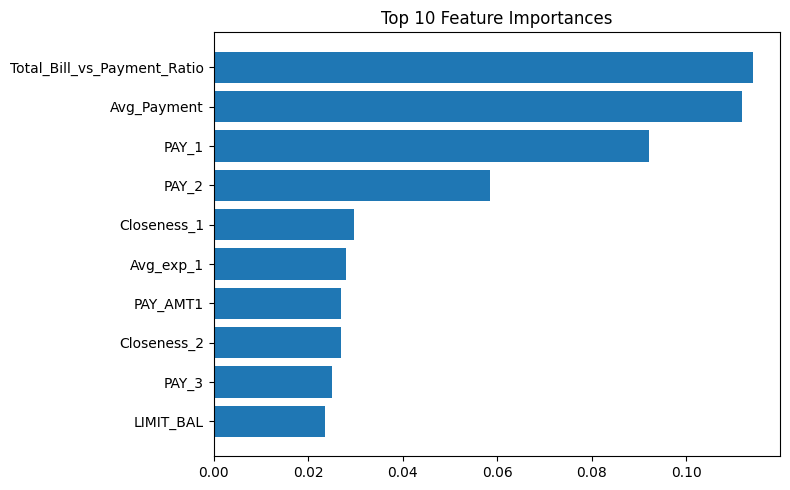

In [18]:
import matplotlib.pyplot as plt
import numpy as np
feature_importances = best_model.feature_importances_
indices = np.argsort(feature_importances)[-10:]  # Get top 10 features
plt.figure(figsize=(8,5))
plt.title('Top 10 Feature Importances')
plt.barh(range(10), feature_importances[indices], align='center')  # Plot in ascending order
plt.yticks(range(10), X.columns[indices])  # Labels match the values
plt.tight_layout()
plt.show()

## 4. Conclusion:
- Achievements: Built a predictive model with advanced feature engineering, reduced dimensionality, and evaluated performance with appropriate metrics.
- Next Steps:
  - Experiment with advanced models like XGBoost.
  - Implement a K-S chart for probability calibration.
  - Deploy the Random Forest model for risk assessment, with Logistic Regression as a fallback for interpretability.